# **traffic-accidents-in-korea-2018**

We will use [traffic accident dataset](https://www.data.go.kr/dataset/3038489/fileData.do) provided by Data.go.kr.

File Name: **도로교통공단_사고유형별_교통사고_통계(2018).zip**

## **List of Files**

**Dataset**: accident_type<br>
*Encoding*: EUC-KR

*   **byMonth.csv** (도로교통공단_사고유형별_월별_교통사고(2018).csv)
*   **byRoadType.csv** (도로교통공단_사고유형별_도로종류별_교통사고(2018).csv)
*   **bySuspectAge.csv** (도로교통공단_사고유형별_가해운전자_연령층별_교통사고(2018).csv)
*   **bySuspectCarType.csv** (도로교통공단_사고유형별_가해운전자_차종별_교통사고(2018).csv)
*   **bySuspectLawViolation.csv** (도로교통공단_사고유형별_가해운전자_법규위반별_교통사고(2018).csv)

Use this code to convert file with encoding **EUC-KR** to **UTF-8**.
```
iconv -f euc-kr -t utf-8 old.csv > new.csv
```

## **Importing Libraries**

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# For Korean support
# Restart runtime if it doesn't work
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

plt.rcParams['font.family'] = ['NanumBarunGothic']
sns.set_style("darkgrid", {"font.sans-serif":['NanumBarunGothic', 'Arial']})

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


## **Setting Directory Path**

In [0]:
DIR_PATH = '/content/drive/My Drive/Colab Notebooks/data/kr-traffic-accidents-2018/accident_type/'

## **Data Analysis**

### **By Month**

In [4]:
byMonth = pd.read_csv(os.path.join(DIR_PATH, 'byMonth.csv'))
print('There are total {0} cases of monthly data \n'.format(byMonth.shape[0]))
byMonth.head()

There are total 203 cases of monthly data 



,사고유형대분류,사고유형,월,발생건수,사망자수,부상자수,중상,경상,부상신고
0,차대사람,횡단중,01월,1667,88,1707,917,720,70
1,차대사람,횡단중,02월,1511,62,1533,760,713,60
2,차대사람,횡단중,03월,1599,76,1629,798,751,80
3,차대사람,횡단중,04월,1544,62,1578,766,750,62
4,차대사람,횡단중,05월,1495,46,1573,739,774,60


In [14]:
# Types of accident
print(byMonth['사고유형'].describe())

count     203
unique     15
top        기타
freq       36
Name: 사고유형, dtype: object


<Figure size 432x576 with 0 Axes>

We can see that there are 15 unique types of accident in this dataset.

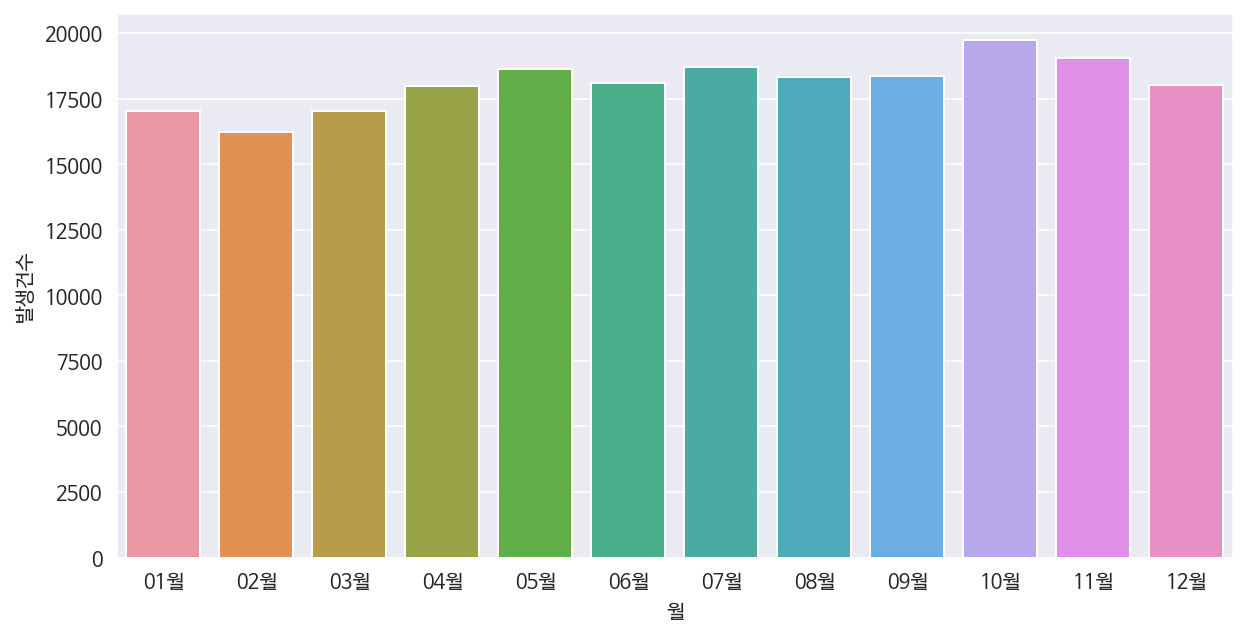

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(data=byMonth, x='월', y='발생건수', ci=None, estimator=sum)

In [0]:
# Tag value on bars
def show_values_on_bars(axs, h_v="v", space=0.4, modh=0, modv=0):
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + float(modv)
                value = int(p.get_height())
                ax.text(_x, _y, value, ha='center') 
        elif h_v == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(modh)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

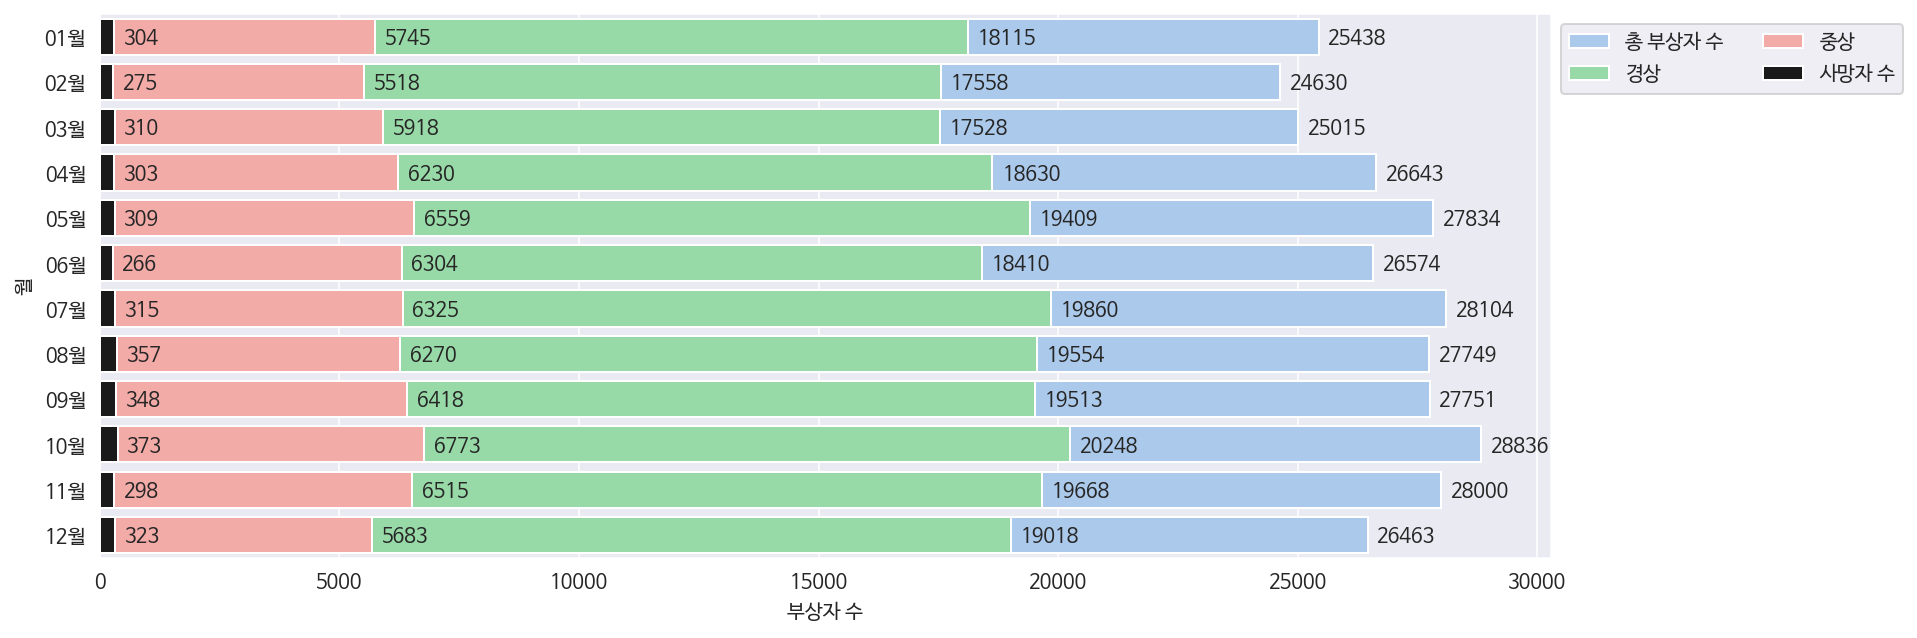

In [19]:
# Shows total injured people and number of people by each type
fig, ax = plt.subplots(figsize=(13, 5))
sns.set_color_codes("pastel")
sns.barplot(x='부상자수', y='월', data=byMonth, label='총 부상자 수', color='b', ci=None, estimator=sum)
sns.barplot(x='경상', y='월', data=byMonth, label='경상', color='g', ci=None, estimator=sum)
sns.barplot(x='중상', y='월', data=byMonth, label='중상', color='r', ci=None, estimator=sum)
sns.barplot(x='사망자수', y='월', data=byMonth, label='사망자 수', color='k', ci=None, estimator=sum)
ax.legend(ncol=2, loc='upper right', frameon=True, bbox_to_anchor=(1.25, 1))
ax.set(xlabel='부상자 수')
show_values_on_bars(ax, 'h', 200, 0.25)

There were the most traffic accidents and most people were hurt in October 2018.

### **by RoadType**

In [20]:
byRoadType = pd.read_csv(os.path.join(DIR_PATH, 'byRoadType.csv'))
print('There are total {0} cases of data \n'.format(byRoadType.shape[0]))
byRoadType.head()

There are total 118 cases of data 



,사고유형대분류,사고유형,도로종류,발생건수,사망자수,부상자수,중상,경상,부상신고
0,차대사람,횡단중,일반국도,902,108,852,490,325,37
1,차대사람,횡단중,지방도,1051,93,1017,514,463,40
2,차대사람,횡단중,특별광역시도,8374,271,8679,4253,4019,407
3,차대사람,횡단중,시도,6829,279,6983,3523,3245,215
4,차대사람,횡단중,군도,531,24,539,300,221,18


In [21]:
print(byRoadType['도로종류'].describe())

count        118
unique         7
top       특별광역시도
freq          18
Name: 도로종류, dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

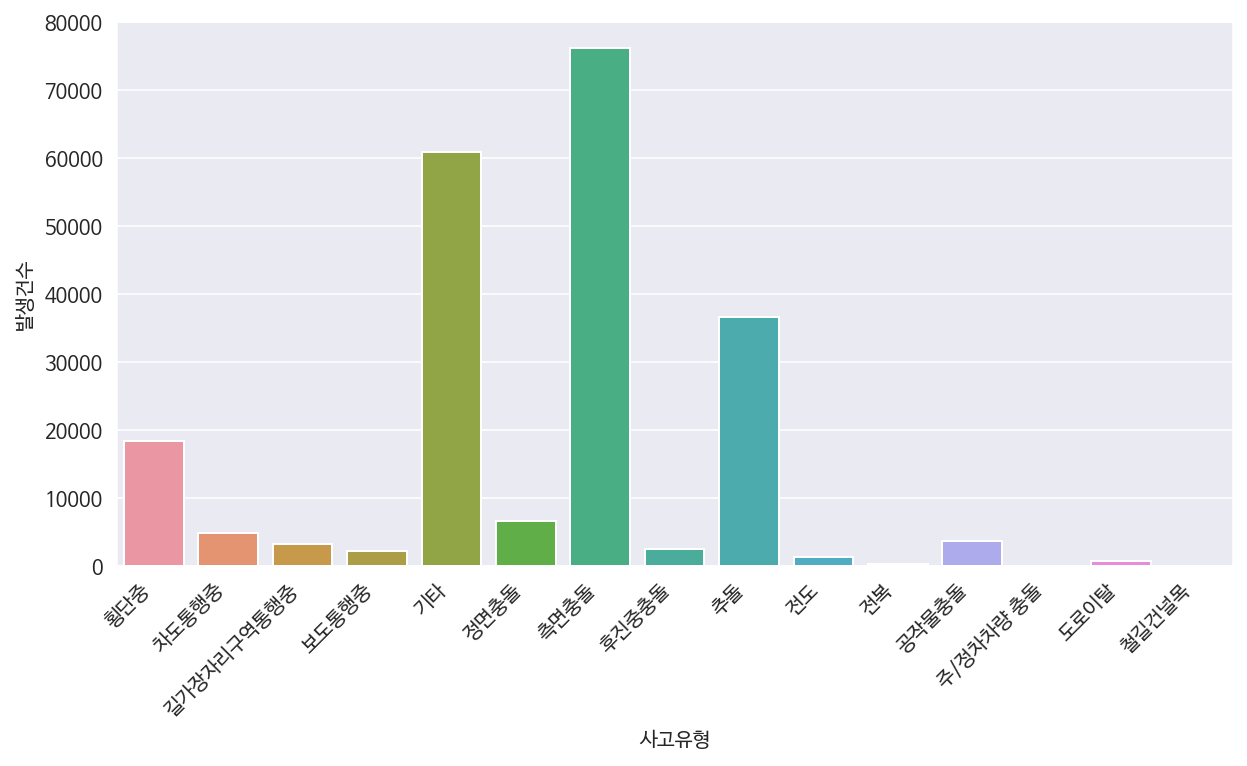

In [65]:
# x: Accident type, y: Accident count
plt.figure(figsize=(10, 5))
sns.barplot(data=byRoadType, x='사고유형', y='발생건수', ci=None, estimator=sum)
plt.xticks(rotation=45, ha='right')

We can see that **side collisions** take up the majority of accidents.

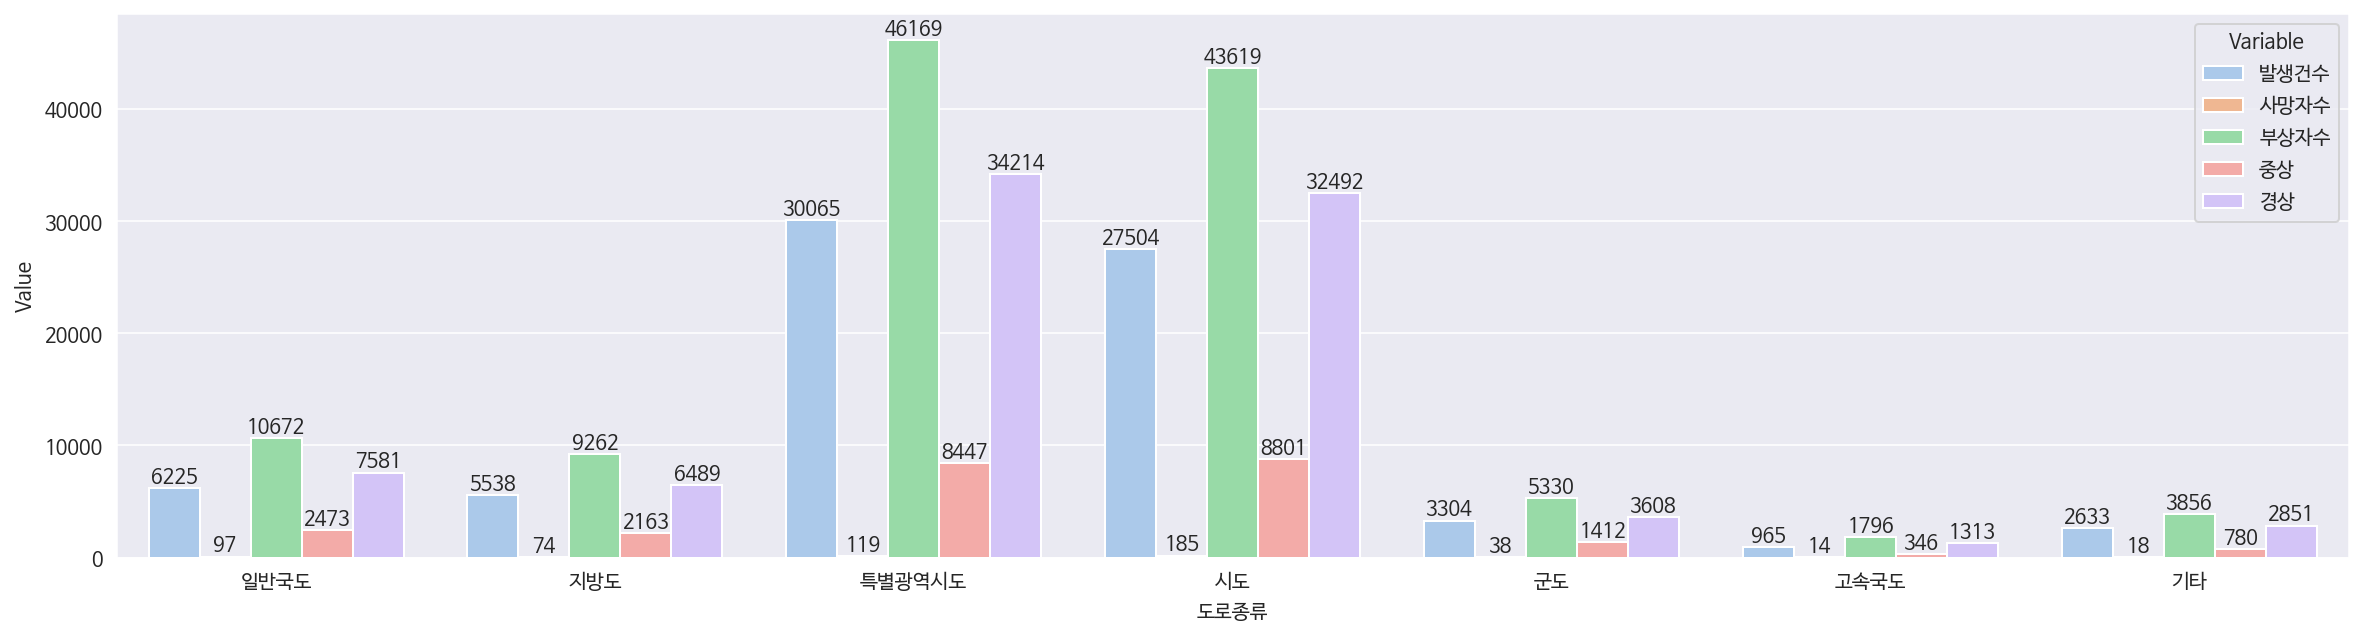

In [116]:
# Severity for each type of road
fig, ax2 = plt.subplots(figsize=(20, 5))
brt_side = byRoadType.loc[byRoadType['사고유형'] == '측면충돌']
brt_side2 = brt_side.drop(brt_side.columns[[0, 1, 8]], axis=1)
tidy = brt_side2.melt(id_vars='도로종류').rename(columns=str.title)
sns.barplot(x='도로종류', y='Value', hue='Variable', data=tidy, ax=ax2)
show_values_on_bars(ax2, 'v', modv=500)

### **by Suspect Age**

In [104]:
bySuspectAge = pd.read_csv(os.path.join(DIR_PATH, 'bySuspectAge.csv'))
print('There are total {0} cases of data \n'.format(bySuspectAge.shape[0]))
bySuspectAge.head()

There are total 147 cases of data 



,사고유형대분류,사고유형,연령,발생건수,사망자수,부상자수,중상,경상,부상신고
0,차대사람,횡단중,12세이하,7,0,7,2,3,2
1,차대사람,횡단중,13-20세,521,11,616,270,304,42
2,차대사람,횡단중,21-30세,2132,87,2247,1116,1032,99
3,차대사람,횡단중,31-40세,2751,125,2810,1458,1251,101
4,차대사람,횡단중,41-50세,3763,176,3804,1905,1789,110


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

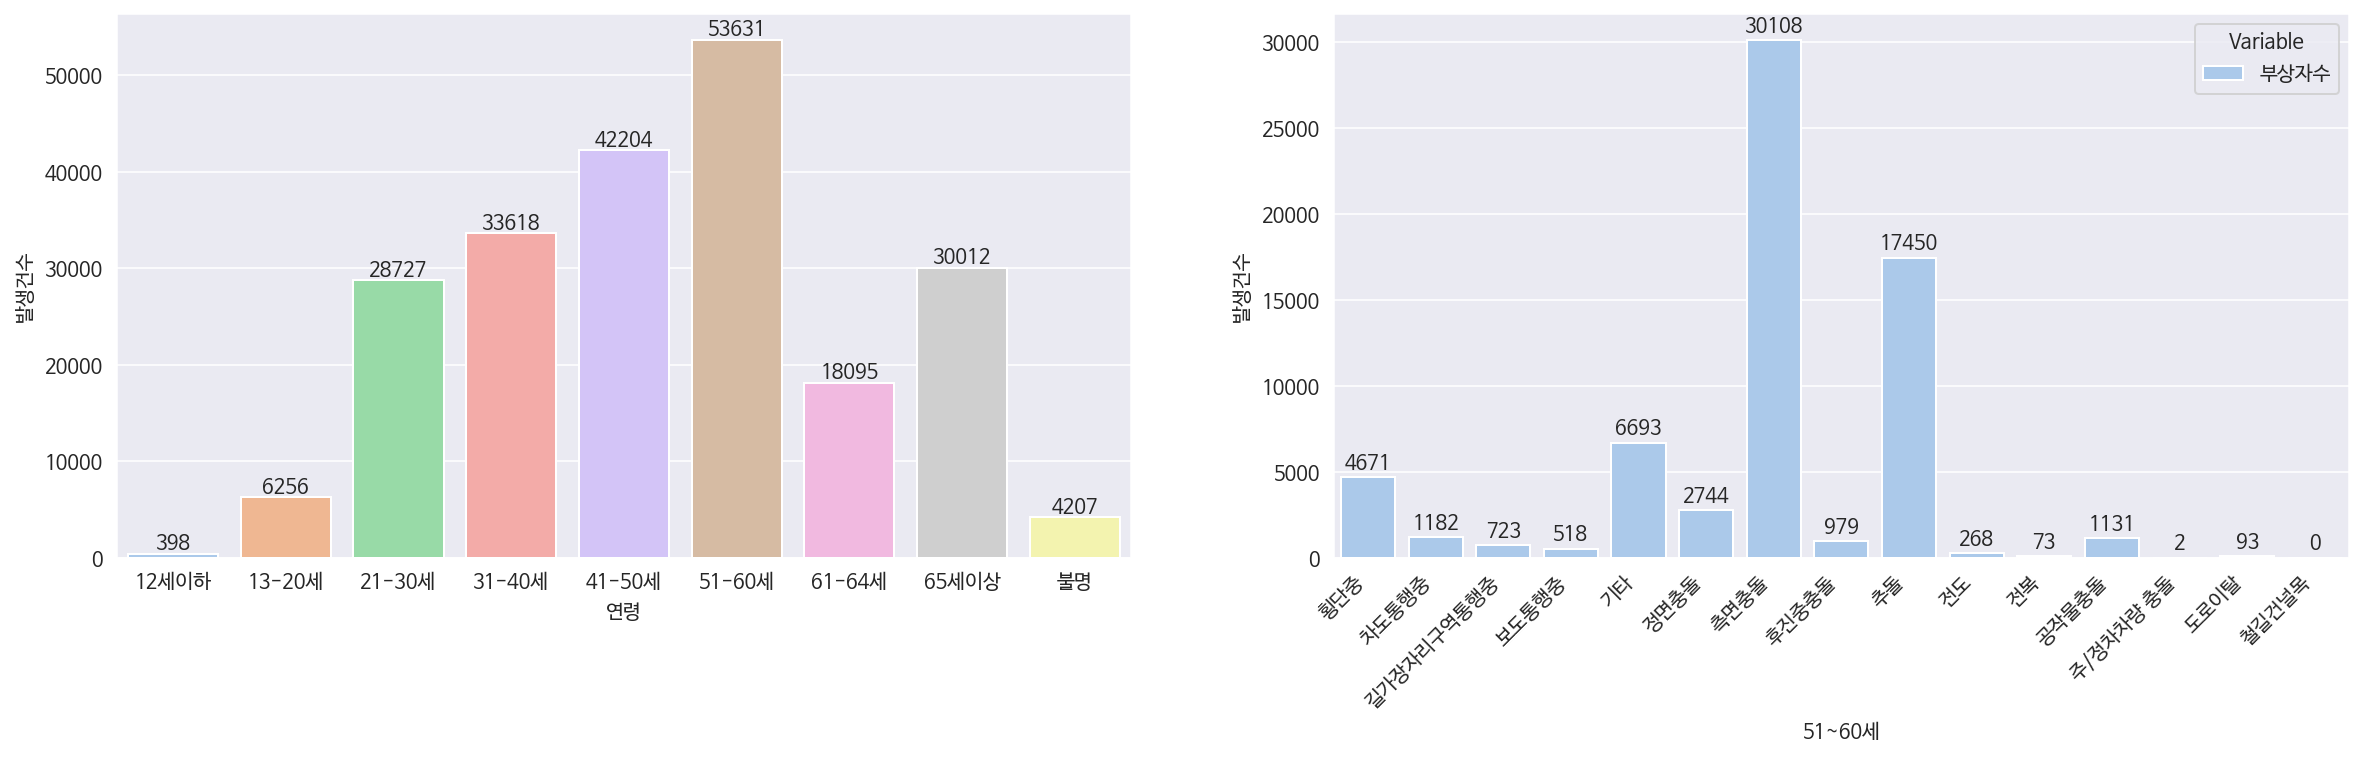

In [132]:
fig1, (ax3, ax4) = plt.subplots(ncols=2, figsize=(20, 5))
sns.barplot(data=bySuspectAge, x='연령', y='발생건수', ci=None, estimator=sum, ax=ax3)
# Accident type of age group 51~60
age_fs = bySuspectAge.loc[bySuspectAge['연령'] == '51-60세']
age_fs2 = age_fs.drop(age_fs.columns.difference(['사고유형','부상자수']), axis=1)
tidy = age_fs2.melt(id_vars='사고유형').rename(columns=str.title)
sns.barplot(x='사고유형', y='Value', hue='Variable', data=tidy, ax=ax4, ci=None)
ax4.set(xlabel='51~60세', ylabel='발생건수')
show_values_on_bars(ax3, 'v', modv=500)
show_values_on_bars(ax4, 'v', modv=500)
plt.xticks(rotation=45, ha='right')

Most suspects of car accident are from age group 51~60.

Number of side collisions were the greatest among accident types they caused.